In [7]:
import numpy as np
import random

class Linear:
    def __init__(self, input_size):
        self.w = np.random.random(input_size)
        self.b = np.random.random()
        self.grad = None
    
    def __call__(self, a):
        return self.w.dot(a) + self.b
    
    def backward(self, grad):
        self.grad = grad

    def update(self, eta):
        self.w -= eta * self.grad
        self.b -= eta * self.grad
    

l = Linear(10)
x = np.random.random(10)
result = l(x)
actual = np.random.random() 
print(actual)
print(result)

for i in range(20):
    loss = (result - actual) ** 2
    l.backward(2 * (result - actual))
    l.update(0.01)
    result = l(x)
    print(loss)


0.1453827298902136
3.6708718073585986
12.429073235348884
9.27119935983186
6.9156513878513675
5.158581135198225
3.847932441356161
2.8702822898746967
2.1410252256572266
1.5970516325419304
1.1912862522308225
0.8886143101681451
0.6628426969226949
0.49443322692002917
0.36881181163720994
0.27510722378114216
0.20521030560435438
0.15307220562021148
0.11418091340213431
0.08517079199663845
0.06353131704058568
0.04738981698175013


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D

# Set up for better plots
plt.rcParams['figure.figsize'] = (12, 8)
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

## Example 1: Gradient of a 1D Function

For a 1D function f(x), the gradient is simply the derivative f'(x).

In [ ]:
# Define a function: f(x) = x^2 + 2x + 1
def f(x):
    return x**2 + 2*x + 1

# Analytical gradient: f'(x) = 2x + 2
def grad_f(x):
    return 2*x + 2

# Numerical gradient using finite differences
def numerical_grad(f, x, h=1e-5):
    """Compute numerical gradient using central difference"""
    return (f(x + h) - f(x - h)) / (2 * h)

# Create x values
x = np.linspace(-5, 3, 1000)
y = f(x)
gradient = grad_f(x)

# Compute numerical gradient for comparison
numerical_gradient = numerical_grad(f, x)

# Plot function and its gradient
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1: Function and gradient
axes[0].plot(x, y, 'b-', linewidth=2, label='f(x) = x² + 2x + 1')
axes[0].plot(x, gradient, 'r--', linewidth=2, label="f'(x) = 2x + 2")
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Function and its Gradient', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)

# Plot 2: Comparison of analytical vs numerical gradient
axes[1].plot(x, gradient, 'r-', linewidth=2, label='Analytical gradient')
axes[1].plot(x, numerical_gradient, 'g--', linewidth=2, label='Numerical gradient', alpha=0.7)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel("f'(x)", fontsize=12)
axes[1].set_title('Analytical vs Numerical Gradient', fontsize=14)
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

# Show gradient at specific points
print("Gradient at specific points:")
for x_val in [-2, -1, 0, 1]:
    print(f"  f'({x_val}) = {grad_f(x_val):.4f}")

## Example 2: Gradient Vectors on a 2D Function

Visualize gradient vectors as arrows on a 2D function surface.

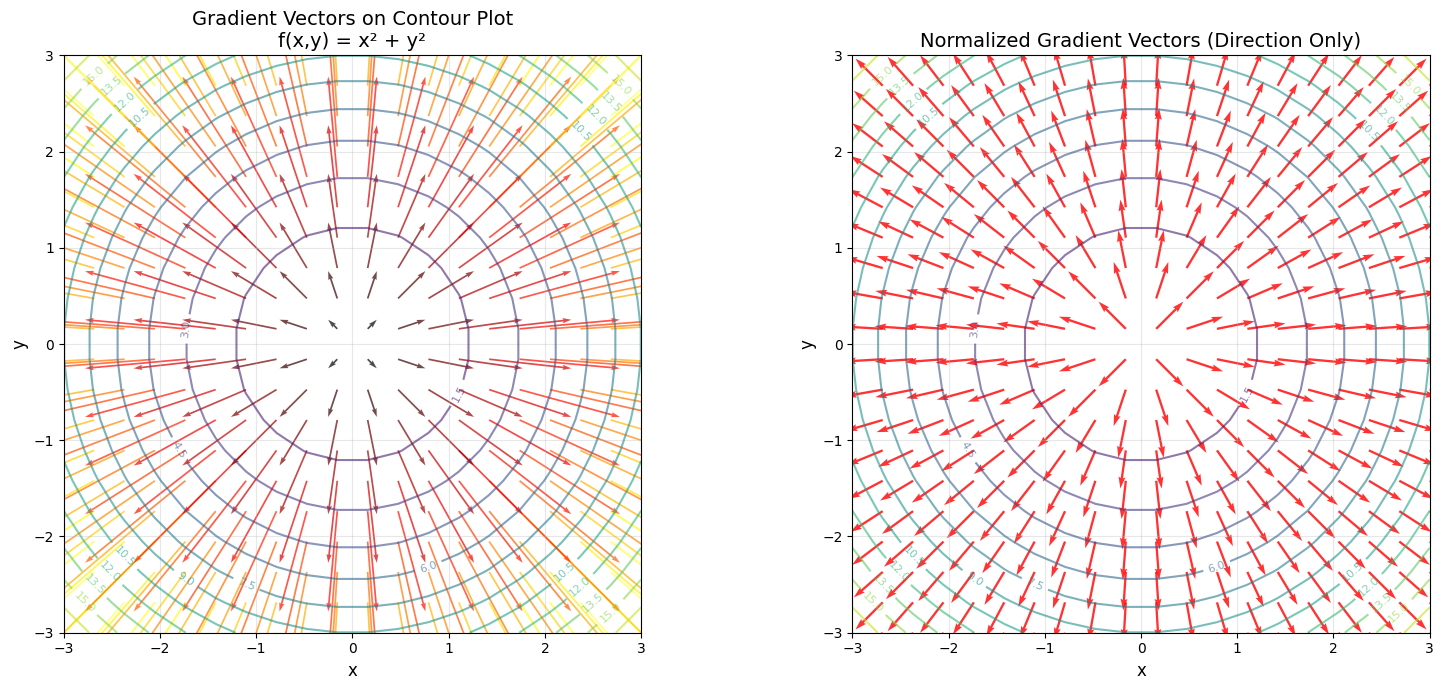

Gradient vectors point in the direction of steepest ascent.
For f(x,y) = x² + y², gradients point away from the origin (0,0).


In [4]:
# Define a 2D function: f(x, y) = x^2 + y^2
def f_2d(x, y):
    return x**2 + y**2

# Gradient: ∇f = [2x, 2y]
def grad_f_2d(x, y):
    return np.array([2*x, 2*y])

# Create grid
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = f_2d(X, Y)

# Compute gradient at grid points
U, V = grad_f_2d(X, Y)

# Normalize vectors for better visualization
magnitude = np.sqrt(U**2 + V**2)
U_norm = U / (magnitude + 1e-10)  # Avoid division by zero
V_norm = V / (magnitude + 1e-10)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Contour plot with gradient vectors
contour = axes[0].contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.6)
axes[0].clabel(contour, inline=True, fontsize=8)
axes[0].quiver(X, Y, U, V, magnitude, cmap='hot', scale=20, width=0.003, alpha=0.7)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Gradient Vectors on Contour Plot\nf(x,y) = x² + y²', fontsize=14)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)

# Plot 2: Normalized gradient vectors (showing direction only)
contour2 = axes[1].contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.6)
axes[1].clabel(contour2, inline=True, fontsize=8)
axes[1].quiver(X, Y, U_norm, V_norm, scale=15, width=0.004, color='red', alpha=0.8)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title('Normalized Gradient Vectors (Direction Only)', fontsize=14)
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Gradient vectors point in the direction of steepest ascent.")
print("For f(x,y) = x² + y², gradients point away from the origin (0,0).")

## Example 3: 3D Surface with Gradient Visualization

In [ ]:
# Define a more interesting 2D function: f(x, y) = sin(x) * cos(y)
def f_sin_cos(x, y):
    return np.sin(x) * np.cos(y)

# Gradient: ∇f = [cos(x)cos(y), -sin(x)sin(y)]
def grad_sin_cos(x, y):
    dx = np.cos(x) * np.cos(y)
    dy = -np.sin(x) * np.sin(y)
    return np.array([dx, dy])

# Create finer grid for surface plot
x = np.linspace(-np.pi, np.pi, 50)
y = np.linspace(-np.pi, np.pi, 50)
X, Y = np.meshgrid(x, y)
Z = f_sin_cos(X, Y)

# Compute gradient
U, V = grad_sin_cos(X, Y)

# Create 3D plot
fig = plt.figure(figsize=(16, 6))

# Plot 1: 3D surface
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_xlabel('x', fontsize=10)
ax1.set_ylabel('y', fontsize=10)
ax1.set_zlabel('f(x,y)', fontsize=10)
ax1.set_title('3D Surface: f(x,y) = sin(x)cos(y)', fontsize=12)
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Plot 2: Contour with gradient vectors
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
ax2.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3], 
           scale=8, width=0.003, color='red', alpha=0.6)
ax2.set_xlabel('x', fontsize=10)
ax2.set_ylabel('y', fontsize=10)
ax2.set_title('Contour Plot with Gradient Vectors', fontsize=12)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

# Plot 3: Gradient magnitude
ax3 = fig.add_subplot(133)
grad_magnitude = np.sqrt(U**2 + V**2)
im = ax3.contourf(X, Y, grad_magnitude, levels=20, cmap='hot', alpha=0.8)
ax3.set_xlabel('x', fontsize=10)
ax3.set_ylabel('y', fontsize=10)
ax3.set_title('Gradient Magnitude |∇f|', fontsize=12)
ax3.set_aspect('equal')
fig.colorbar(im, ax=ax3, shrink=0.8)

plt.tight_layout()
plt.show()

## Example 4: Gradient Descent Visualization

Show how gradient descent follows the negative gradient direction to find the minimum.

In [1]:
# Function: f(x, y) = (x-1)^2 + (y-1)^2 (minimum at (1, 1))
def f_min(x, y):
    return (x - 1)**2 + (y - 1)**2

# Gradient: ∇f = [2(x-1), 2(y-1)]
def grad_f_min(x, y):
    return np.array([2*(x-1), 2*(y-1)])

# Gradient descent
def gradient_descent(start, learning_rate=0.1, iterations=50):
    """Perform gradient descent"""
    path = [start.copy()]
    current = start.copy()
    
    for i in range(iterations):
        grad = grad_f_min(current[0], current[1])
        current -= learning_rate * grad
        path.append(current.copy())
    
    return np.array(path)

# Create grid for contour plot
x = np.linspace(-1, 3, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f_min(X, Y)

# Run gradient descent from different starting points
starts = [np.array([-0.5, -0.5]), np.array([2.5, -0.5]), np.array([-0.5, 2.5]), np.array([2.5, 2.5])]
paths = []
for start in starts:
    path = gradient_descent(start, learning_rate=0.1, iterations=30)
    paths.append(path)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Contour plot
contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# Plot gradient descent paths
colors = ['red', 'blue', 'green', 'orange']
for i, path in enumerate(paths):
    ax.plot(path[:, 0], path[:, 1], 'o-', color=colors[i], 
            linewidth=2, markersize=4, label=f'Start: ({starts[i][0]:.1f}, {starts[i][1]:.1f})')
    ax.plot(path[0, 0], path[0, 1], 's', color=colors[i], markersize=10, markeredgecolor='black')
    ax.plot(path[-1, 0], path[-1, 1], '*', color=colors[i], markersize=15, markeredgecolor='black')

# Mark the minimum
ax.plot(1, 1, 'r*', markersize=20, label='Minimum (1, 1)', markeredgecolor='black')

# Add gradient vectors at some points
x_grad = np.linspace(-0.5, 2.5, 5)
y_grad = np.linspace(-0.5, 2.5, 5)
X_grad, Y_grad = np.meshgrid(x_grad, y_grad)
U_grad, V_grad = grad_f_min(X_grad, Y_grad)
# Normalize for visualization
mag_grad = np.sqrt(U_grad**2 + V_grad**2)
U_grad_norm = -U_grad / (mag_grad + 1e-10) * 0.2  # Negative gradient (descent direction)
V_grad_norm = -V_grad / (mag_grad + 1e-10) * 0.2
ax.quiver(X_grad, Y_grad, U_grad_norm, V_grad_norm, 
          scale=1, width=0.005, color='purple', alpha=0.5, label='Negative gradient (descent)')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Gradient Descent: f(x,y) = (x-1)² + (y-1)²', fontsize=14)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

print("Gradient descent follows the negative gradient direction to find the minimum.")
print(f"All paths converge to the minimum at (1, 1).")

NameError: name 'np' is not defined

## Example 5: Using NumPy's gradient() Function

NumPy provides a built-in `gradient()` function for numerical differentiation.